# AUTOMATED STOCK OPEN PRICE PREDICTION
### AUTHOR : Aravind Ravikumar
### DATE WRITTEN: 6-June-2020
### Goal: To predict Open price of SBI 

In [159]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
train = pd.read_csv('../Data/STOCKS.CSV')
dfg = pd.read_csv('../Data/HangSeng.CSV')
dfy = pd.read_csv('../Data/NYSE.CSV')
dfz = pd.read_csv('../Data/Shenzhen.CSV')
dfk = pd.read_csv('../Data/KOSPI.CSV')
dfe = pd.read_csv('../Data/Euronext100.CSV')
dfx = pd.read_csv('../Data/SGXNifty.CSV')
dfn = pd.read_csv('../Data/NASDAQ.CSV')
dfi = pd.read_csv('../Data/Nikkei.CSV')

In [161]:
dfi.head()

,Date,Nikkei Open
0,07-01-2015,16808.25977
1,08-01-2015,17067.40039
2,09-01-2015,17318.74023
3,13-01-2015,16970.88086
4,14-01-2015,16961.82031


In [162]:
dfx.head()

,Date,SGXNifty Open
0,"Jan 07, 2015","8,149.50"
1,"Jan 08, 2015","8,151.50"
2,"Jan 09, 2015","8,256.50"
3,"Jan 12, 2015","8,314.50"
4,"Jan 13, 2015","8,357.50"


## Converting to common date format

In [163]:
train['Date'] =  pd.to_datetime(train['Date'], format='%d-%m-%Y')
dfg['Date'] =  pd.to_datetime(dfg['Date'], format='%d-%m-%Y')
dfy['Date'] =  pd.to_datetime(dfy['Date'], format='%d-%m-%Y')
dfz['Date'] =  pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfk['Date'] =  pd.to_datetime(dfk['Date'], format='%d-%m-%Y')
dfe['Date'] =  pd.to_datetime(dfe['Date'], format='%d-%m-%Y')
dfx['Date'] =  pd.to_datetime(dfx['Date'], format='%b %d, %Y')
dfn['Date'] =  pd.to_datetime(dfn['Date'], format='%d-%m-%Y')
dfi['Date'] =  pd.to_datetime(dfi['Date'], format='%d-%m-%Y')

## Merging Dataframes on the basis of date

In [164]:
train = pd.merge(train,dfg,how='inner',on='Date')
train = pd.merge(train,dfz,how='inner',on='Date')
train = pd.merge(train,dfy,how='inner',on='Date')
train = pd.merge(train,dfk,how='inner',on='Date')
train = pd.merge(train,dfe,how='inner',on='Date')
train = pd.merge(train,dfx,how='inner',on='Date')
train = pd.merge(train,dfn,how='inner',on='Date')
train = pd.merge(train,dfi,how='inner',on='Date')

In [165]:
train['SGXNifty Open'] = train['SGXNifty Open'].str.replace(",","").astype(float) # string to float conversion

In [166]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,Wipro Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,Wipro Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
0,2015-01-07,8127.350098,119.312721,172.062637,289.701782,322.932098,183.633774,120.250000,195.899994,300.000000,384.875000,203.699997,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977
1,2015-01-08,8102.100098,118.381363,171.755310,289.943268,315.258636,182.236313,122.099998,197.000000,305.000000,379.250000,208.556000,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039
2,2015-01-09,8234.599609,123.626411,172.589493,294.483459,322.553589,183.549332,127.400002,201.050003,306.700012,384.162994,205.949997,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023
3,2015-01-13,8323.000000,122.891121,172.238251,296.656952,331.226013,187.271072,125.250000,195.350006,308.149994,393.888000,208.912994,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086
4,2015-01-14,8299.400391,124.067589,172.150452,294.724976,332.917969,189.780365,126.099998,196.199997,304.000000,398.975006,212.250000,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031


In [167]:
train.shape

(1081, 20)

In [168]:
train.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'Wipro Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'Wipro Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open'],
      dtype='object')

In [169]:
# Rearrange columns

train = train[['Date', 'NIFTY_India Adj Close', 'SBI Adj Close',
       'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open', 'SBI Open']]

In [170]:
train.head(2)

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,SBI Open
0,2015-01-07,8127.350098,289.701782,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,300.0
1,2015-01-08,8102.100098,289.943268,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,305.0


In [171]:
train.isnull().sum()

Date                      0
NIFTY_India Adj Close     6
SBI Adj Close             2
HangSeng Open             3
Shenzhen Open             1
NYSE Adj Close            0
KOSPI Open                5
Euronext Adj Close        1
SGXNifty Open             0
NASDAQ Adj Close          0
Nikkei Open              13
SBI Open                  0
dtype: int64

In [172]:
#Displaying rows having Null values

train[train['SBI Adj Close'].isnull()]

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,SBI Open
27,2015-03-02,NaN,NaN,24996.75977,11869.959960,11062.79004,1996.719971,973.010010,8895.5,4963.529785,18869.40039,305.899994
990,2019-10-29,NaN,NaN,27027.56055,9812.480469,13186.42969,2103.919922,1099.329956,11668.0,8325.990234,22950.78906,283.149994


In [173]:
# strategies to fill null values
#train['Escorts Open'][train['Date'] == '10/25/2019'] = train['Escorts Open'][train['Date'] == '10/27/2019']
train['NIFTY_India Adj Close'].fillna(train['NIFTY_India Adj Close'].mean(),inplace=True)
train['Nikkei Open'].fillna(train['Nikkei Open'].mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [174]:
train.shape

(1069, 12)

In [175]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
SBI Adj Close            0
HangSeng Open            0
Shenzhen Open            0
NYSE Adj Close           0
KOSPI Open               0
Euronext Adj Close       0
SGXNifty Open            0
NASDAQ Adj Close         0
Nikkei Open              0
SBI Open                 0
dtype: int64

# Feature Selection Methods 
## Filter Method: Correlation Coefficient

In [176]:
train.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,SBI Open
0,2015-01-07,8127.350098,289.701782,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,300.000000
1,2015-01-08,8102.100098,289.943268,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,305.000000
2,2015-01-09,8234.599609,294.483459,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023,306.700012
3,2015-01-13,8323.000000,296.656952,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086,308.149994
4,2015-01-14,8299.400391,294.724976,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031,304.000000


In [177]:
cor = train.corr()
cor

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,SBI Open
NIFTY_India Adj Close,1.000000,0.763757,0.766893,-0.450094,0.945338,0.495026,0.842400,0.998477,0.947671,0.824164,0.725532
SBI Adj Close,0.763757,1.000000,0.672758,-0.137789,0.755438,0.420404,0.738530,0.765776,0.640769,0.682354,0.994864
HangSeng Open,0.766893,0.672758,1.000000,-0.005471,0.833537,0.777748,0.806060,0.767356,0.703703,0.832053,0.651607
Shenzhen Open,-0.450094,-0.137789,-0.005471,1.000000,-0.303254,-0.018939,-0.083794,-0.452783,-0.446607,-0.141168,-0.097406
NYSE Adj Close,0.945338,0.755438,0.833537,-0.303254,1.000000,0.624710,0.919124,0.947106,0.920579,0.889342,0.722747
KOSPI Open,0.495026,0.420404,0.777748,-0.018939,0.624710,1.000000,0.624734,0.497214,0.417057,0.618370,0.394840
Euronext Adj Close,0.842400,0.738530,0.806060,-0.083794,0.919124,0.624734,1.000000,0.843630,0.810895,0.904074,0.719913
SGXNifty Open,0.998477,0.765776,0.767356,-0.452783,0.947106,0.497214,0.843630,1.000000,0.947391,0.825160,0.728189
NASDAQ Adj Close,0.947671,0.640769,0.703703,-0.446607,0.920579,0.417057,0.810895,0.947391,1.000000,0.821314,0.595813
Nikkei Open,0.824164,0.682354,0.832053,-0.141168,0.889342,0.618370,0.904074,0.825160,0.821314,1.000000,0.658250


In [179]:
cor.index[abs(cor['SBI Open']) > .65]

Index(['NIFTY_India Adj Close', 'SBI Adj Close', 'HangSeng Open',
       'NYSE Adj Close', 'Euronext Adj Close', 'SGXNifty Open', 'Nikkei Open',
       'SBI Open'],
      dtype='object')

## Wrapper Method: Step forward feature selection

In [180]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [181]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['SBI Adj Close', 'HangSeng Open', 'KOSPI Open', 'Euronext Adj Close',
       'NASDAQ Adj Close'],
      dtype='object')


## Finding Independent Features

In [182]:
train2 = train[['NIFTY_India Adj Close', 'SBI Adj Close', 'HangSeng Open',
       'NYSE Adj Close', 'Euronext Adj Close', 'SGXNifty Open', 'Nikkei Open']]

In [183]:
train2.head(2)

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,Nikkei Open
0,8127.350098,289.701782,23396.69922,10514.87012,805.469971,8149.5,16808.25977
1,8102.100098,289.943268,23920.34961,10627.12988,810.940002,8151.5,17067.40039


In [184]:
cor2 = train2.corr()
cor2

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,Nikkei Open
NIFTY_India Adj Close,1.000000,0.763757,0.766893,0.945338,0.842400,0.998477,0.824164
SBI Adj Close,0.763757,1.000000,0.672758,0.755438,0.738530,0.765776,0.682354
HangSeng Open,0.766893,0.672758,1.000000,0.833537,0.806060,0.767356,0.832053
NYSE Adj Close,0.945338,0.755438,0.833537,1.000000,0.919124,0.947106,0.889342
Euronext Adj Close,0.842400,0.738530,0.806060,0.919124,1.000000,0.843630,0.904074
SGXNifty Open,0.998477,0.765776,0.767356,0.947106,0.843630,1.000000,0.825160
Nikkei Open,0.824164,0.682354,0.832053,0.889342,0.904074,0.825160,1.000000


## It shows that Singapore Nifty Open and Indian Nifty Close are highly correlated. Similarly, NYSE Close and Euronext Close are correlated with each other and also to Indian Nifty Close.

## Normalization

In [29]:
#X = train[train.columns[0:-1]]
# Y = train[train.columns[-1]]


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_tr = scaler.transform(X_train)
# X_te = scaler.transform(X_test)    
# #Converting n-d array to dataframe
# X_train = pd.DataFrame(X_tr, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])
# X_test = pd.DataFrame(X_te, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])

## Feature Selection using Ensemble Random Forest

In [185]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]

In [186]:
model = RandomForestRegressor(max_depth=4, n_estimators=160)

In [187]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [188]:
labels = list(X.columns)[0:-1]

In [189]:
for feature in zip(labels, model.feature_importances_):
    print(feature)

('NIFTY_India Adj Close', 0.0)
('SBI Adj Close', 0.9997702359934165)
('HangSeng Open', 0.0)
('Shenzhen Open', 5.377919891461504e-05)
('NYSE Adj Close', 2.777974959576571e-05)
('KOSPI Open', 0.0)
('Euronext Adj Close', 0.0)
('SGXNifty Open', 2.7091409881966894e-05)
('NASDAQ Adj Close', 8.927724627195349e-05)


In [190]:
sfm = SelectFromModel(model, threshold=1e-05)
sfm.fit(X,Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=4,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=160, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_s

In [192]:
# for index in sfm.get_support(indices=True):
#     print(labels[index])

In [ ]:
# X_train_imp = sfm.transform(X)
# X_test_imp = sfm.transform(X_test)

## Since all features are numerical, we give importance to correlation feature selection.
## Link: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Selecting Features

In [193]:
#Dont forget to add target column
train_final = train[['NIFTY_India Adj Close', 
                     'SBI Adj Close',
                    'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     #'Nikkei Open',
                     'SBI Open']]
train_final.head(2)

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,SBI Open
0,8127.350098,289.701782,23396.69922,805.469971,300.0
1,8102.100098,289.943268,23920.34961,810.940002,305.0


# Handle outliers using IQR

In [194]:
Q1 = train_final.quantile(0.25)
Q3 = train_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NIFTY_India Adj Close    2438.500000
SBI Adj Close              46.609436
HangSeng Open            4994.279300
Euronext Adj Close        134.730041
SBI Open                   45.949997
dtype: float64


In [195]:
train_final = train_final[~((train_final < (Q1 - 1.5 * IQR)) |(train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
train_final.shape

(1025, 5)

In [196]:
train_final.head(2)

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,SBI Open
0,8127.350098,289.701782,23396.69922,805.469971,300.0
1,8102.100098,289.943268,23920.34961,810.940002,305.0


## Test Data

In [197]:
test = pd.read_csv('../Data/STOCKS_test.CSV')
dfgt = pd.read_csv('../Data/HangSeng_test.CSV')
dfyt = pd.read_csv('../Data/NYSE_test.CSV')
dfzt = pd.read_csv('../Data/Shenzhen_test.CSV')
dfkt = pd.read_csv('../Data/KOSPI_test.CSV')
dfet = pd.read_csv('../Data/Euronext100_test.CSV')
dfit = pd.read_csv('../Data/Nikkei_test.CSV')

In [198]:
#Converting to common date format

test['Date'] =  pd.to_datetime(test['Date'], format='%d-%m-%Y')
dfgt['Date'] =  pd.to_datetime(dfgt['Date'], format='%d-%m-%Y')
dfyt['Date'] =  pd.to_datetime(dfyt['Date'], format='%d-%m-%Y')
dfzt['Date'] =  pd.to_datetime(dfzt['Date'], format='%d-%m-%Y')
dfkt['Date'] =  pd.to_datetime(dfkt['Date'], format='%d-%m-%Y')
dfet['Date'] =  pd.to_datetime(dfet['Date'], format='%d-%m-%Y')
dfit['Date'] =  pd.to_datetime(dfit['Date'], format='%d-%m-%Y')

In [199]:
#Merging Dataframes based on date

test = pd.merge(test,dfgt,how='inner',on='Date')
test = pd.merge(test,dfzt,how='inner',on='Date')
test = pd.merge(test,dfyt,how='inner',on='Date')
test = pd.merge(test,dfkt,how='inner',on='Date')
test = pd.merge(test,dfet,how='inner',on='Date')
test = pd.merge(test,dfit,how='inner',on='Date')

In [200]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,Wipro Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,Wipro Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,Nikkei Open
0,2020-04-08,8792.200195,663.750000,675.849976,186.399994,451.149994,191.899994,653.700012,662.299988,182.899994,451.000000,191.500000,24191.32031,10372.75977,10537.04004,1815.750000,872.619995,19047.75977
1,2020-04-09,8748.750000,642.349976,687.150024,183.000000,463.100006,192.899994,661.000000,700.000000,188.000000,480.700012,198.399994,24181.32031,10453.86035,10902.58984,1838.089966,874.390015,19376.00000
2,2020-04-16,8925.299805,714.700012,691.299988,182.350006,478.750000,186.550003,710.000000,672.000000,182.000000,473.000000,180.000000,24025.44922,10361.76953,10843.91992,1839.510010,857.039978,19311.30078
3,2020-04-17,8992.799805,714.299988,693.599976,188.500000,459.750000,187.850006,744.000000,715.099976,196.000000,470.000000,192.500000,24457.83008,10562.90039,10818.03027,1893.310059,857.710022,19575.84961
4,2020-04-20,9266.750000,746.200012,706.799988,193.250000,455.250000,187.000000,749.450012,714.750000,194.000000,458.000000,189.000000,24503.56055,10553.54981,11208.29004,1908.339966,883.280029,19689.84961


In [201]:
test.shape

(26, 18)

In [202]:
test.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'Wipro Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'Wipro Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'Nikkei Open'],
      dtype='object')

In [203]:
# Rearrange columns

test = test[['Date','NIFTY_India Adj Close', 
                     'SBI Adj Close',
                    'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                      #'Nikkei Open',
                     'SBI Open']]

In [204]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,SBI Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000


In [205]:
test.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
SBI Adj Close            0
HangSeng Open            0
Euronext Adj Close       0
SBI Open                 0
dtype: int64

## Apply Machine Learning Models

In [206]:
X = train_final[train_final.columns[0:-1]]
Y = train_final[train_final.columns[-1]]

In [207]:
X_test = test[test.columns[1:-1]]

In [208]:
test.rename(columns = {'SBI Open':'Actual Open'}, inplace=True)

In [209]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000


## 1. Linear Regression Model

In [210]:
X.head()

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close
0,8127.350098,289.701782,23396.69922,805.469971
1,8102.100098,289.943268,23920.34961,810.940002
2,8234.599609,294.483459,24049.69922,837.729980
3,8323.000000,296.656952,23908.23047,832.760010
4,8299.400391,294.724976,24276.33008,845.299988


In [211]:
model_linear = LinearRegression()

In [212]:
model_linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
model_linear.coef_

array([-2.96954662e-03,  1.03562092e+00, -2.62296698e-05,  1.48981211e-02])

In [214]:
X_test.head()

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close
0,8792.200195,186.399994,24191.32031,872.619995
1,8748.750000,183.000000,24181.32031,874.390015
2,8925.299805,182.350006,24025.44922,857.039978
3,8992.799805,188.500000,24457.83008,857.710022
4,9266.750000,193.250000,24503.56055,883.280029


In [215]:
test['LR Predicted Open'] = model_linear.predict(X_test)

In [216]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994,187.002958
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000,183.637513
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000,182.185698
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000,188.352958
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000,192.838395


In [217]:
model_linear.score(X_test, test['Actual Open'])

0.9316005595083486

In [218]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['LR Predicted Open'])

13.160960971817461

## 2. Support Vector Regression

In [219]:
model_svr = SVR()

In [142]:
hyperparameter_grid = {'kernel':['rbf', 'linear'],
                       'C':[.01, .1, 1, 10, 50, 100],
                       'tol': [1e-4, 1e-3]
                      }
                       
grid_cv = GridSearchCV(estimator=model_svr,
            param_grid=hyperparameter_grid,
            cv=5,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [143]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['rbf', 'linear'], 'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [144]:
grid_cv.best_estimator_

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [220]:
model_svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [221]:
model_svr.fit(X,Y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [222]:
test['SVR Predicted Open'] = model_svr.predict(X_test)

In [223]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994,187.002958,187.456459
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000,183.637513,184.081599
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000,182.185698,182.751902
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000,188.352958,188.950314
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000,192.838395,193.388579


In [224]:
#test.drop('Predicted Open',axis=1)

In [225]:
model_svr.score(X_test, test['Actual Open'])

0.9390352326715157

In [226]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['SVR Predicted Open'])

11.730431092693632

## 3. Random Forest Regressor

In [227]:
model_rf = RandomForestRegressor()

In [228]:
hyperparameter_grid = {'n_estimators':[ _ for _ in range(20,150,10)],
                       'max_depth':[_ for _ in range(4,20,2)],
                       'max_features': ['sqrt','auto'],
                       'min_samples_leaf': [1,2,3],
                       'bootstrap':[True, False] }


grid_cv = GridSearchCV(estimator=model_rf,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [229]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 1248 candidates, totalling 6240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 854 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 1718 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 2258 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2870 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3554 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4310 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5138 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6038 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6240 out of 6240 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [142]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [279]:
model_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [280]:
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [281]:
test['Random Forest Predicted Open'] = model_rf.predict(X_test)

In [282]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994,187.002958,187.456459,190.322282
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000,183.637513,184.081599,189.223958
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000,182.185698,182.751902,189.047625
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000,188.352958,188.950314,191.844784
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000,192.838395,193.388579,197.596133


In [283]:
model_rf.score(X_test, test['Actual Open'])

-1.2727191441634598

In [284]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['Random Forest Predicted Open'])

437.30135423971115

## 4. XGBoost Regressor

In [285]:
model_xg = xgb.XGBRegressor()

In [286]:
hyperparameter_grid = {  
    "n_estimators": [_ for _ in range(20,200,20)],
    "max_depth": [_ for _ in range(2,14,2)],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    
    
}
                       

random_cv = RandomizedSearchCV(estimator=model_xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [287]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   15.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                   

In [288]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1.0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3.0, missing=nan, monotone_constraints=None,
             n_estimators=160, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [296]:
model_xg = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1.0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3.0, monotone_constraints=None,
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [297]:
model_xg.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1.0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3.0, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [298]:
X_test.head()

,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close
0,8792.200195,186.399994,24191.32031,872.619995
1,8748.750000,183.000000,24181.32031,874.390015
2,8925.299805,182.350006,24025.44922,857.039978
3,8992.799805,188.500000,24457.83008,857.710022
4,9266.750000,193.250000,24503.56055,883.280029


In [299]:
test['XGBoost Predicted Open'] = model_xg.predict(X_test)

In [300]:
test.head()

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994,187.002958,187.456459,190.322282,187.430420
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000,183.637513,184.081599,189.223958,185.779602
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000,182.185698,182.751902,189.047625,185.386475
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000,188.352958,188.950314,191.844784,188.908218
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000,192.838395,193.388579,197.596133,193.931946


In [301]:
model_xg.score(X_test, test['Actual Open'])

-0.6260267942024458

In [302]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['XGBoost Predicted Open'])

312.86915541713944

## 5. AdaBoost Regressor

In [303]:
model_ada = AdaBoostRegressor()

In [304]:
hyperparameter_grid = {'n_estimators':[20, 40, 50, 60, 80, 100, 200, 400, 1000],
                       'learning_rate':[0.1, 0.3, 0.5],
                       'loss': ['linear','square'] }


grid_cv = GridSearchCV(estimator=model_ada,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [305]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200, 400,
                                          1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [306]:
grid_cv.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=60, random_state=None)

In [331]:
model_ada = AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [332]:
model_ada.fit(X,Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [333]:
test['AdaBoost Predicted Open'] = model_ada.predict(X_test)

In [334]:
test.head(5)

,Date,NIFTY_India Adj Close,SBI Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open,AdaBoost Predicted Open
0,2020-04-08,8792.200195,186.399994,24191.32031,872.619995,182.899994,187.002958,187.456459,190.322282,187.430420,195.266666
1,2020-04-09,8748.750000,183.000000,24181.32031,874.390015,188.000000,183.637513,184.081599,189.223958,185.779602,195.266666
2,2020-04-16,8925.299805,182.350006,24025.44922,857.039978,182.000000,182.185698,182.751902,189.047625,185.386475,195.266667
3,2020-04-17,8992.799805,188.500000,24457.83008,857.710022,196.000000,188.352958,188.950314,191.844784,188.908218,195.266667
4,2020-04-20,9266.750000,193.250000,24503.56055,883.280029,194.000000,192.838395,193.388579,197.596133,193.931946,200.707316


In [335]:
model_ada.score(X_test, test['Actual Open'])

-2.616919214289081

In [336]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['AdaBoost Predicted Open'])

695.9433041456742

# SVR model is selected for Stock Open Price prediction.

In [337]:
test.set_index('Date',inplace=True)

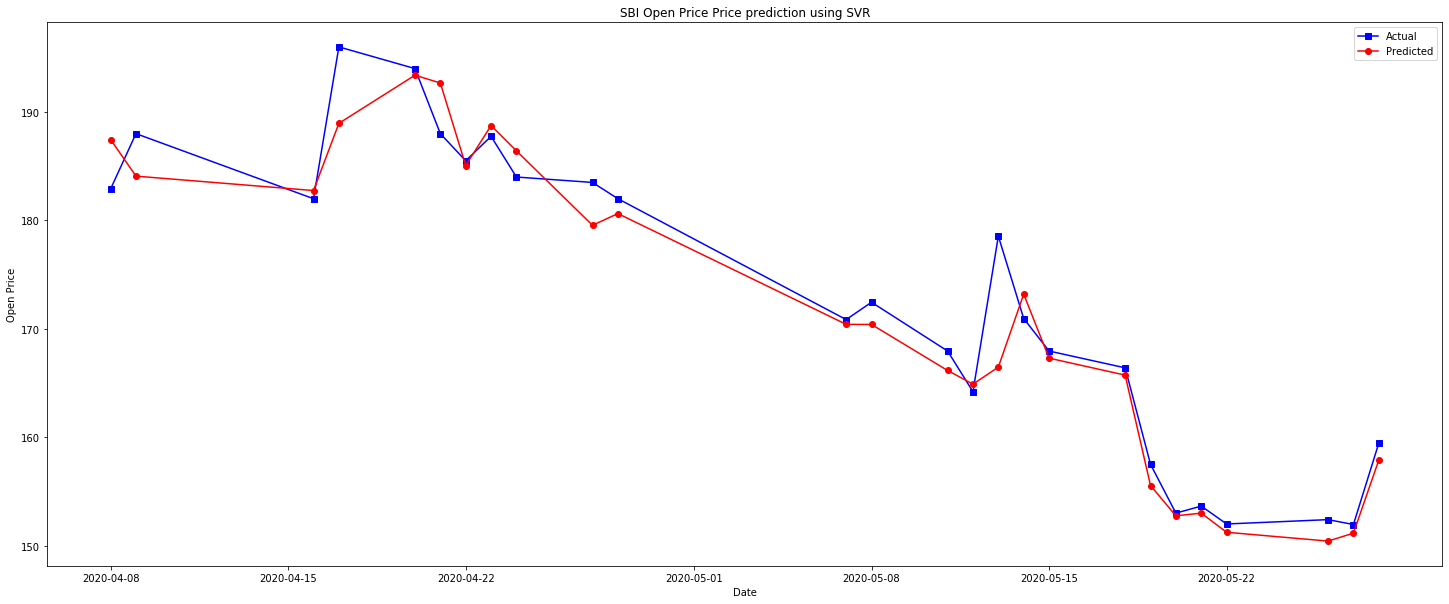

In [338]:
plt.figure(figsize = (25, 10))

plt.plot(test['Actual Open'], 'bs-', label = 'Actual')
plt.plot(test['SVR Predicted Open'], 'ro-', label = 'Predicted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.title('SBI Open Price Price prediction using SVR')
plt.show()

In [339]:
from joblib import dump, load
dump(model_svr, 'sbi_SVR.joblib')

['sbi_SVR.joblib']